In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
df = pd.read_csv(r"CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df = df.drop(columns=["CUST_ID"])
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [6]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [7]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)

In [8]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm)
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,2.045620e-17,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-6.964046e-02,0.235672,-0.820660
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,9.956102e-18,-0.107259,-0.841413
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-7.112317e-02,0.069795,-0.874082
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-7.184155e-02,0.068175,-0.853792


In [11]:
pca = PCA(n_components=2, random_state=42)
df_2d = pca.fit_transform(df_norm)
df_2d = pd.DataFrame(df_2d, columns=["P1", "P2"])
df_2d.head()

,P1,P2
0,-0.489826,-0.679679
1,-0.518791,0.545010
2,0.330885,0.268979
3,-0.482374,-0.092112
4,-0.563289,-0.481915


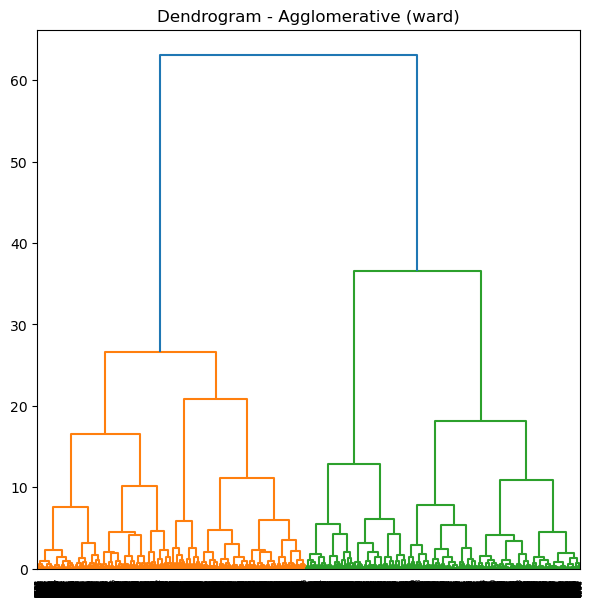

In [12]:
plt.figure(figsize=(7,7))
plt.title("Dendrogram - Agglomerative (ward)")
shc.dendrogram(shc.linkage(df_2d, method='ward'))
plt.show()

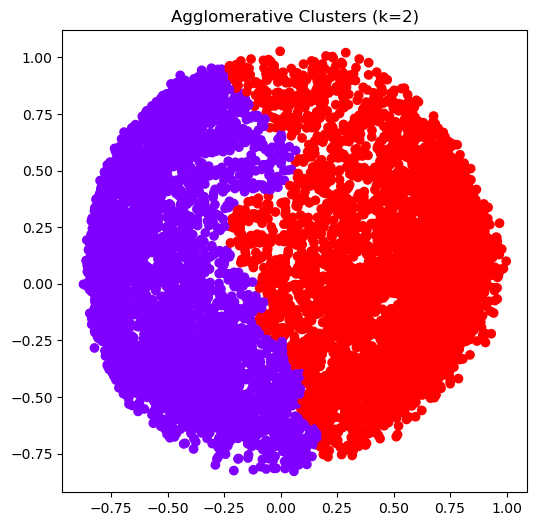

In [13]:
ac = AgglomerativeClustering(n_clusters=2)
labels = ac.fit_predict(df_2d)

plt.figure(figsize=(6,6))
plt.scatter(df_2d["P1"], df_2d["P2"], c=labels, cmap="rainbow")
plt.title("Agglomerative Clusters (k=2)")
plt.show()

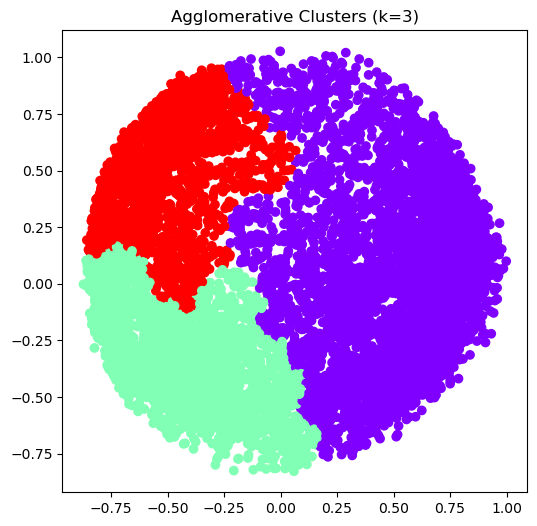

In [14]:
ac = AgglomerativeClustering(n_clusters=3)
labels = ac.fit_predict(df_2d)

plt.figure(figsize=(6,6))
plt.scatter(df_2d["P1"], df_2d["P2"], c=labels, cmap="rainbow")
plt.title("Agglomerative Clusters (k=3)")
plt.show()

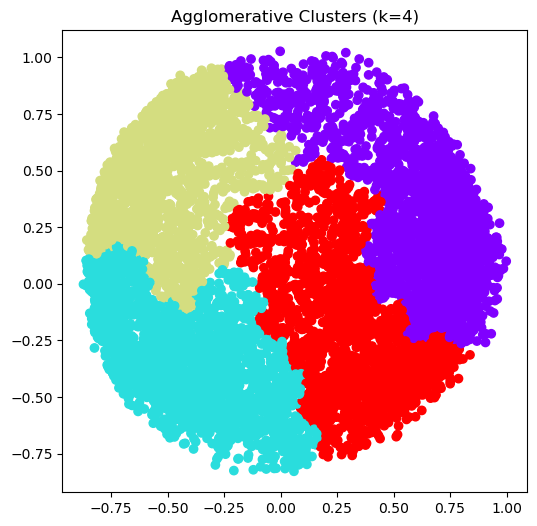

In [15]:
ac = AgglomerativeClustering(n_clusters=4)
labels = ac.fit_predict(df_2d)

plt.figure(figsize=(6,6))
plt.scatter(df_2d["P1"], df_2d["P2"], c=labels, cmap="rainbow")
plt.title("Agglomerative Clusters (k=4)")
plt.show()

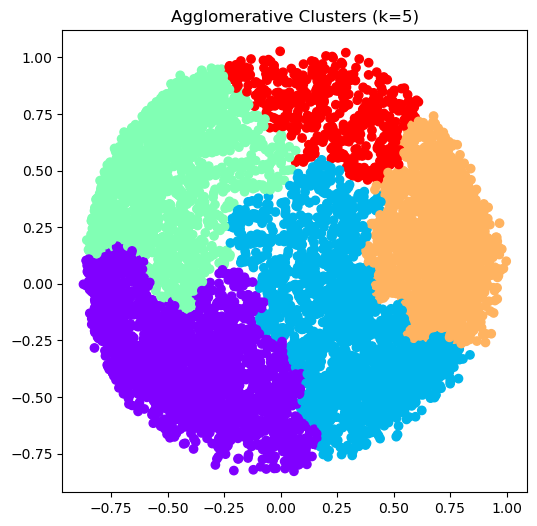

In [16]:
ac = AgglomerativeClustering(n_clusters=5)
labels = ac.fit_predict(df_2d)

plt.figure(figsize=(6,6))
plt.scatter(df_2d["P1"], df_2d["P2"], c=labels, cmap="rainbow")
plt.title("Agglomerative Clusters (k=5)")
plt.show()

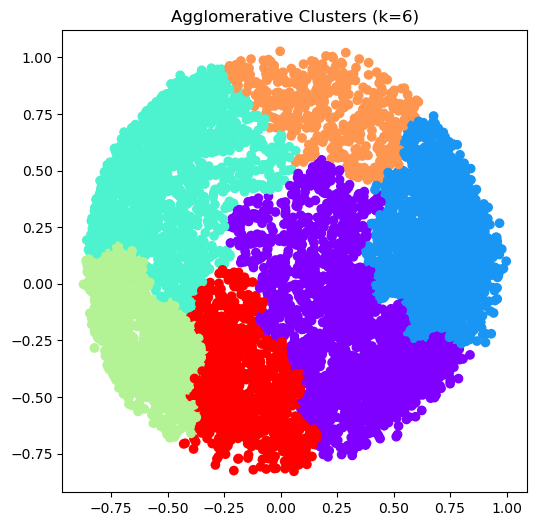

In [17]:
ac = AgglomerativeClustering(n_clusters=6)
labels = ac.fit_predict(df_2d)

plt.figure(figsize=(6,6))
plt.scatter(df_2d["P1"], df_2d["P2"], c=labels, cmap="rainbow")
plt.title("Agglomerative Clusters (k=6)")
plt.show()

In [18]:
scores = {}

# Compute silhouette score for k = 2 to 6
for k in [2, 3, 4, 5, 6]:
    ac = AgglomerativeClustering(n_clusters=k)
    labels = ac.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores[k] = score
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.4373
Silhouette Score for k=3: 0.4167
Silhouette Score for k=4: 0.3531
Silhouette Score for k=5: 0.3506
Silhouette Score for k=6: 0.3178


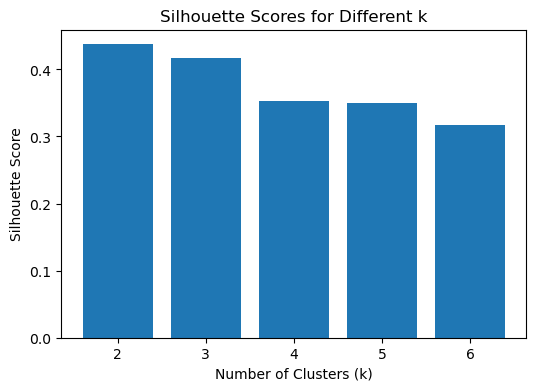

In [19]:
plt.figure(figsize=(6,4))
plt.bar(scores.keys(), scores.values())
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()